<a href="https://colab.research.google.com/github/tammyray997/NGG6050/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

1. Plot the relationship between Age and Wing Length.

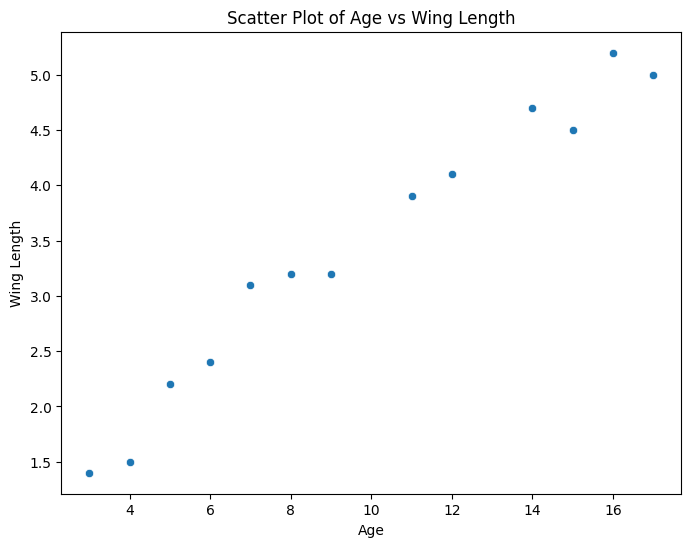

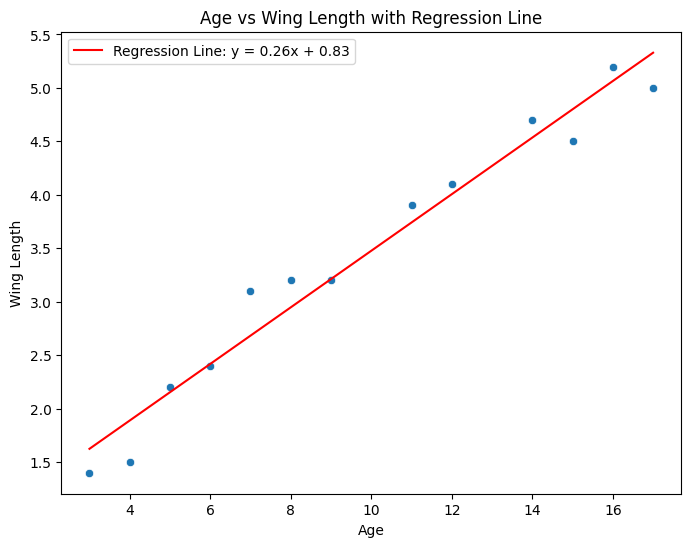

We reject the null hypothesis: p-value = 0.0000
Slope: 0.2647
95% Confidence Interval for slope: (0.2304, 0.2989)
R-squared: 0.9634
Pearson's r: 0.9815
Pearson's p-value: 0.0000


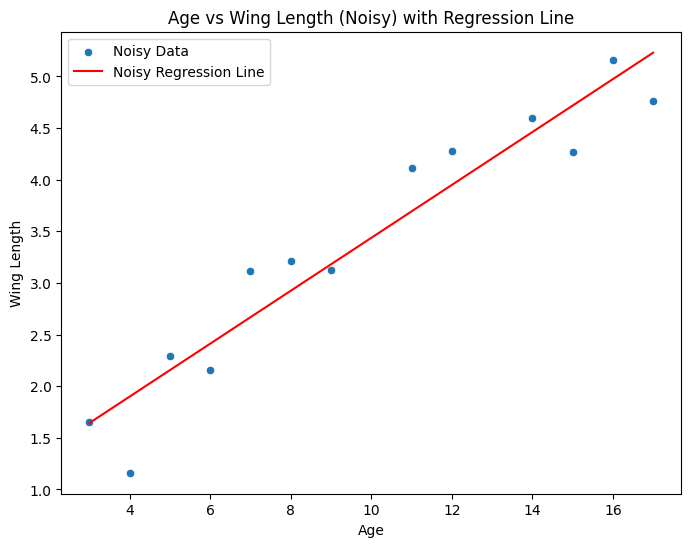

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you've loaded your dataset into a DataFrame called `data`:
# For now, I'm going to simulate some data.
# Replace this with your actual data loading method, e.g. `pd.read_csv()`

# Sample dataset of Age and Wing Length
data = pd.DataFrame({
    'Age': [3,4,5,6,7,8,9,11,12,14,15,16,17],
    'Wing Length': [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]
})

# 1. Plot the relationship between Age and Wing Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length', data=data)
plt.title('Scatter Plot of Age vs Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

# 2. Calculate and plot the regression line
X = data[['Age']]
y = data['Wing Length']
reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
intercept = reg.intercept_

# Plot regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length', data=data)
plt.plot(data['Age'], reg.predict(X), color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Age vs Wing Length with Regression Line')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()

# 3. Can you reject H0? (Null Hypothesis test for the slope)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Age'], data['Wing Length'])
alpha = 0.05
if p_value < alpha:
    print(f"We reject the null hypothesis: p-value = {p_value:.4f}")
else:
    print(f"We fail to reject the null hypothesis: p-value = {p_value:.4f}")

# 4. Calculate and plot confidence intervals on the slope of the regression
n = len(data['Age'])
t_value = stats.t.ppf(1 - alpha/2, df=n-2)
ci_slope = t_value * std_err

print(f"Slope: {slope:.4f}")
print(f"95% Confidence Interval for slope: ({slope - ci_slope:.4f}, {slope + ci_slope:.4f})")

# 5. Calculate R^2 (the coefficient of determination)
r_squared = r2_score(data['Wing Length'], reg.predict(X))
print(f"R-squared: {r_squared:.4f}")

# 6. Calculate Pearson's r
pearson_r, pearson_p = stats.pearsonr(data['Age'], data['Wing Length'])
print(f"Pearson's r: {pearson_r:.4f}")
print(f"Pearson's p-value: {pearson_p:.4f}")

# 7. Add some noise to the data and see how the regression changes
noise = np.random.normal(0, 0.2, size=n)
data['Wing Length Noisy'] = data['Wing Length'] + noise

# Re-run the regression with noisy data
X_noisy = data[['Age']]
y_noisy = data['Wing Length Noisy']
reg_noisy = LinearRegression().fit(X_noisy, y_noisy)

# Plot the new noisy regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length Noisy', data=data, label='Noisy Data')
plt.plot(data['Age'], reg_noisy.predict(X_noisy), color='red', label='Noisy Regression Line')
plt.title('Age vs Wing Length (Noisy) with Regression Line')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()
